In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('results.csv')
t5large = results[results['model'] == 't5-large']
t5small = results[results['model'] == 't5-small']
length = t5large[t5large['task'] == 'sentence length']
disc = t5large[t5large['task'] == 'discourse']
depth = t5large[t5large['task'] == 'tree depth']
number = t5large[t5large['task'] == 'subject number']

In [4]:
layer = length.iloc[:7]['layer']

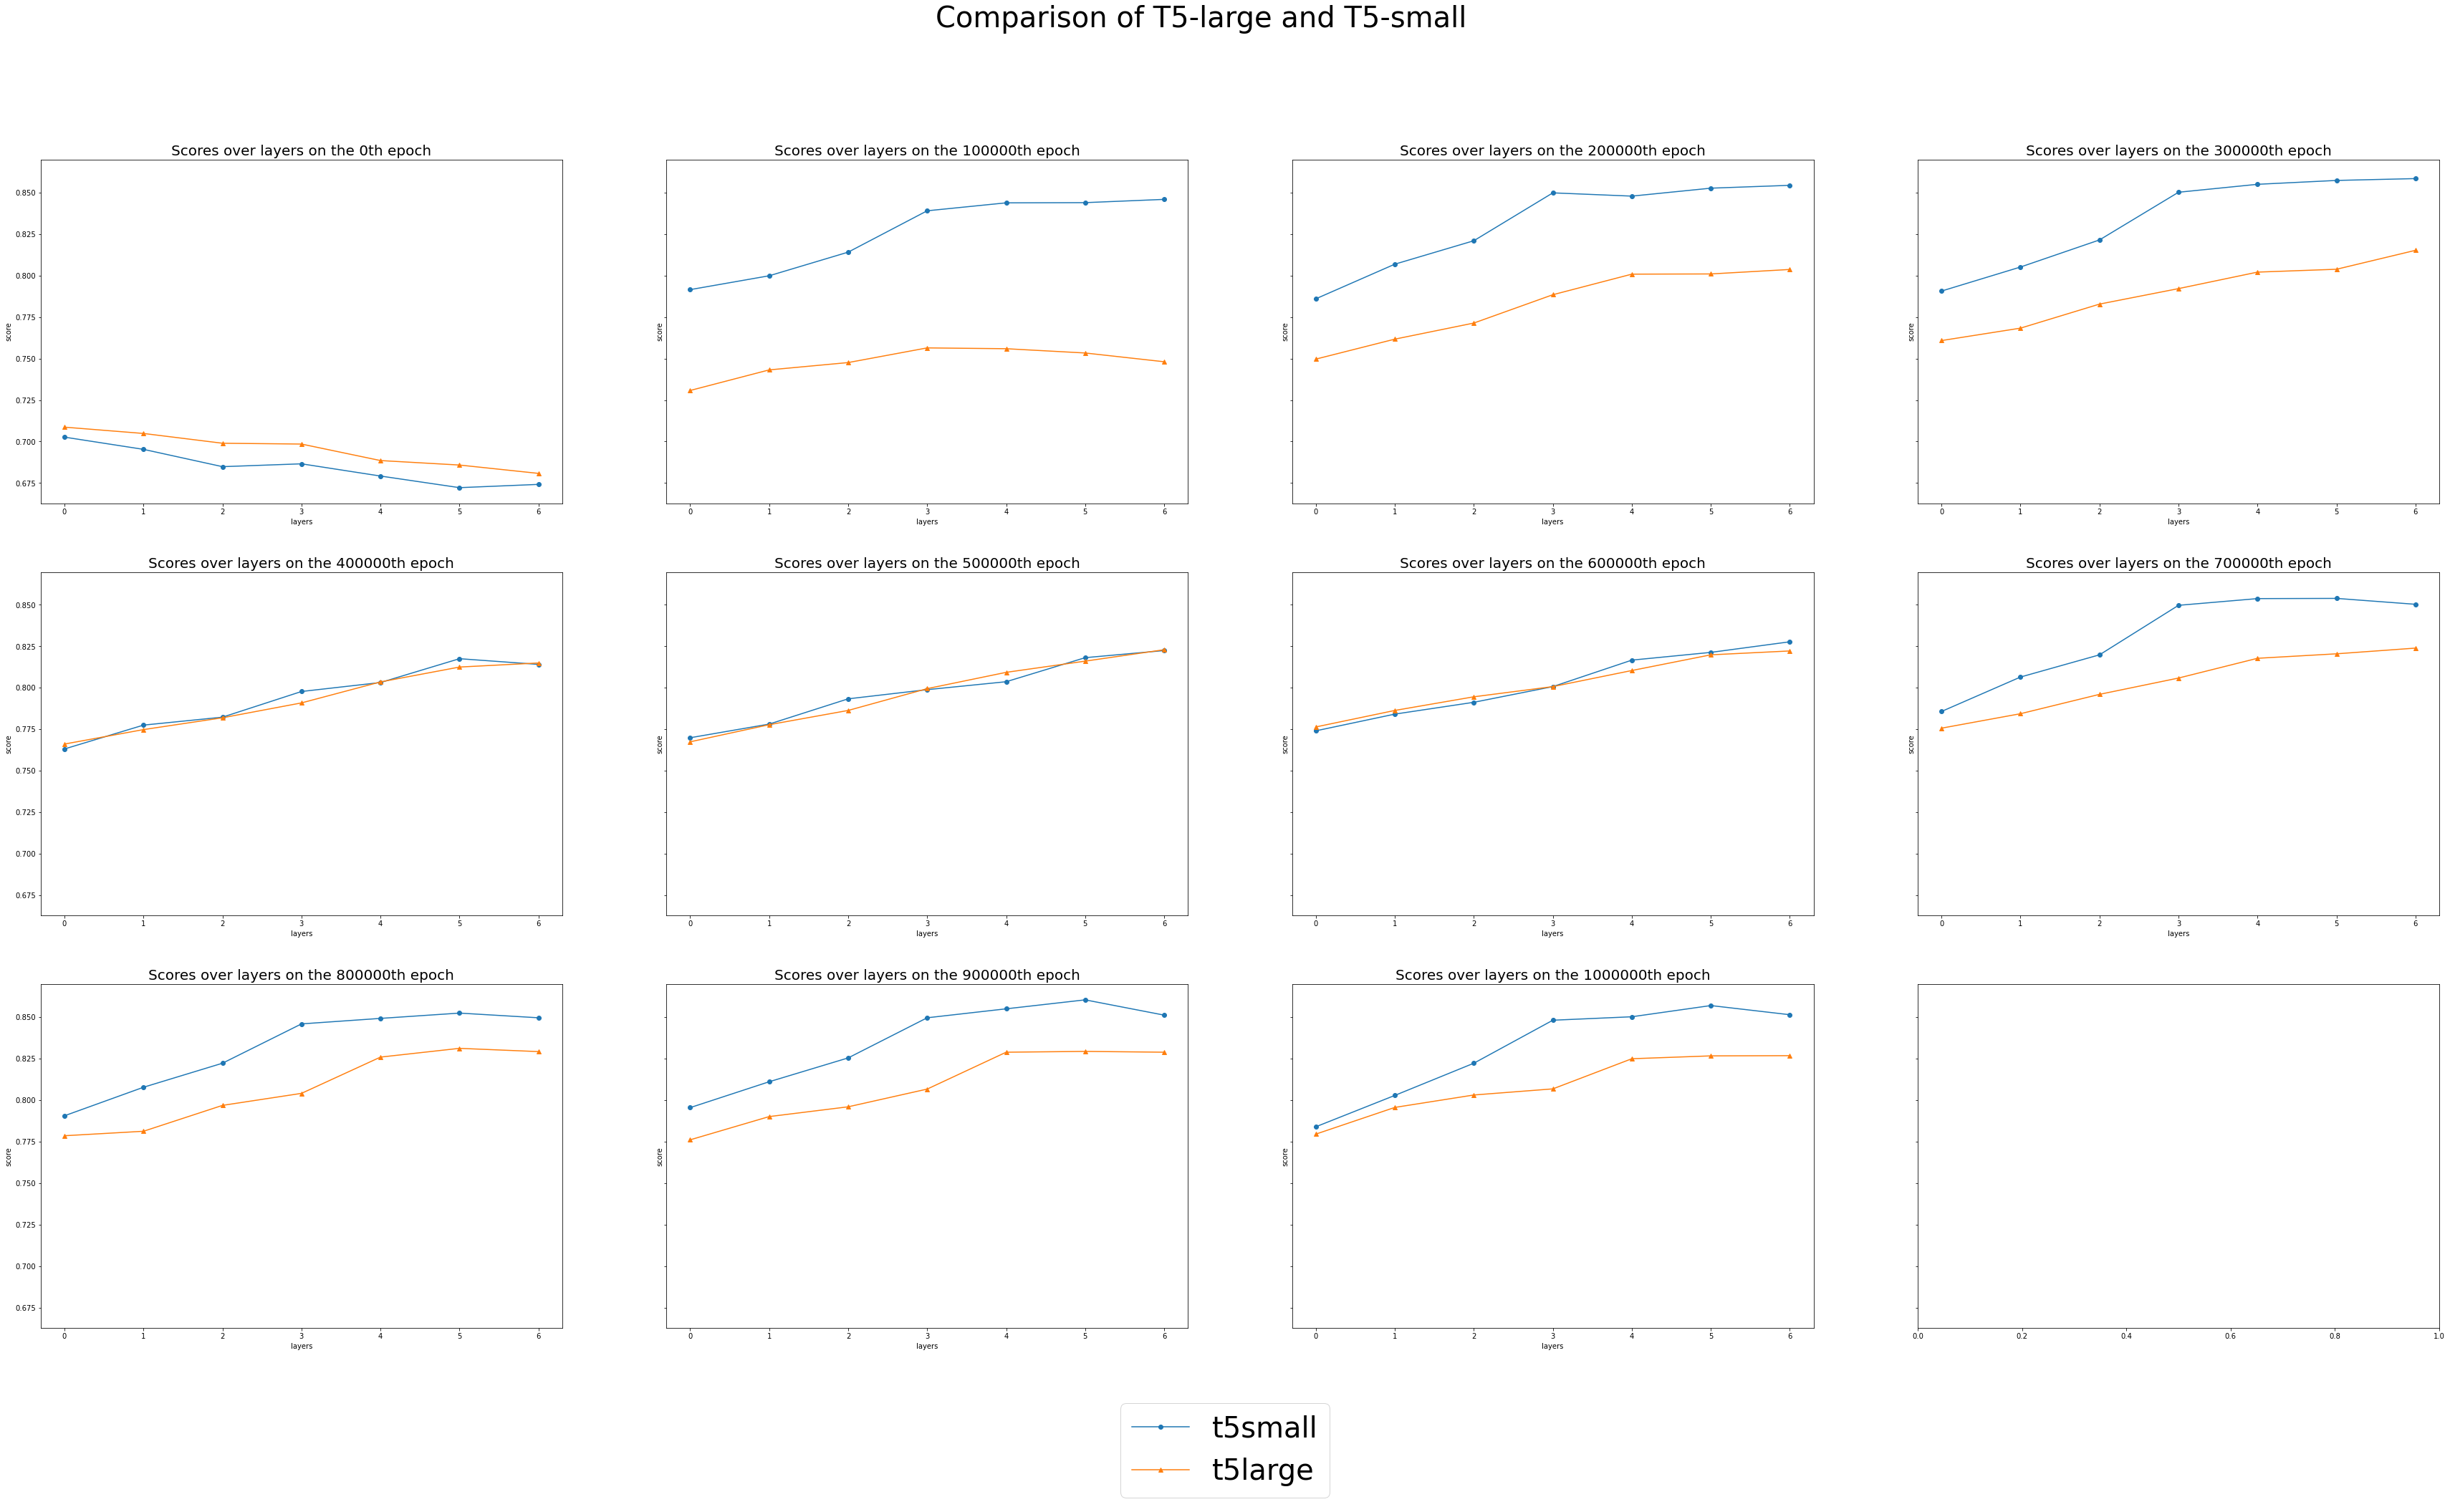

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)
epoches = 1100000
x = 0
j = 0
for i in range(0, epoches, 100000):
    layers = ax[x, j].plot(layer, t5small[t5small['epoche']==i]['accuracy'], label='t5small', marker='o')
    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='t5large', marker='^')
    layers = ax[x, j].set_xlabel('layers')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of T5-large and T5-small', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':40})
plt.show()

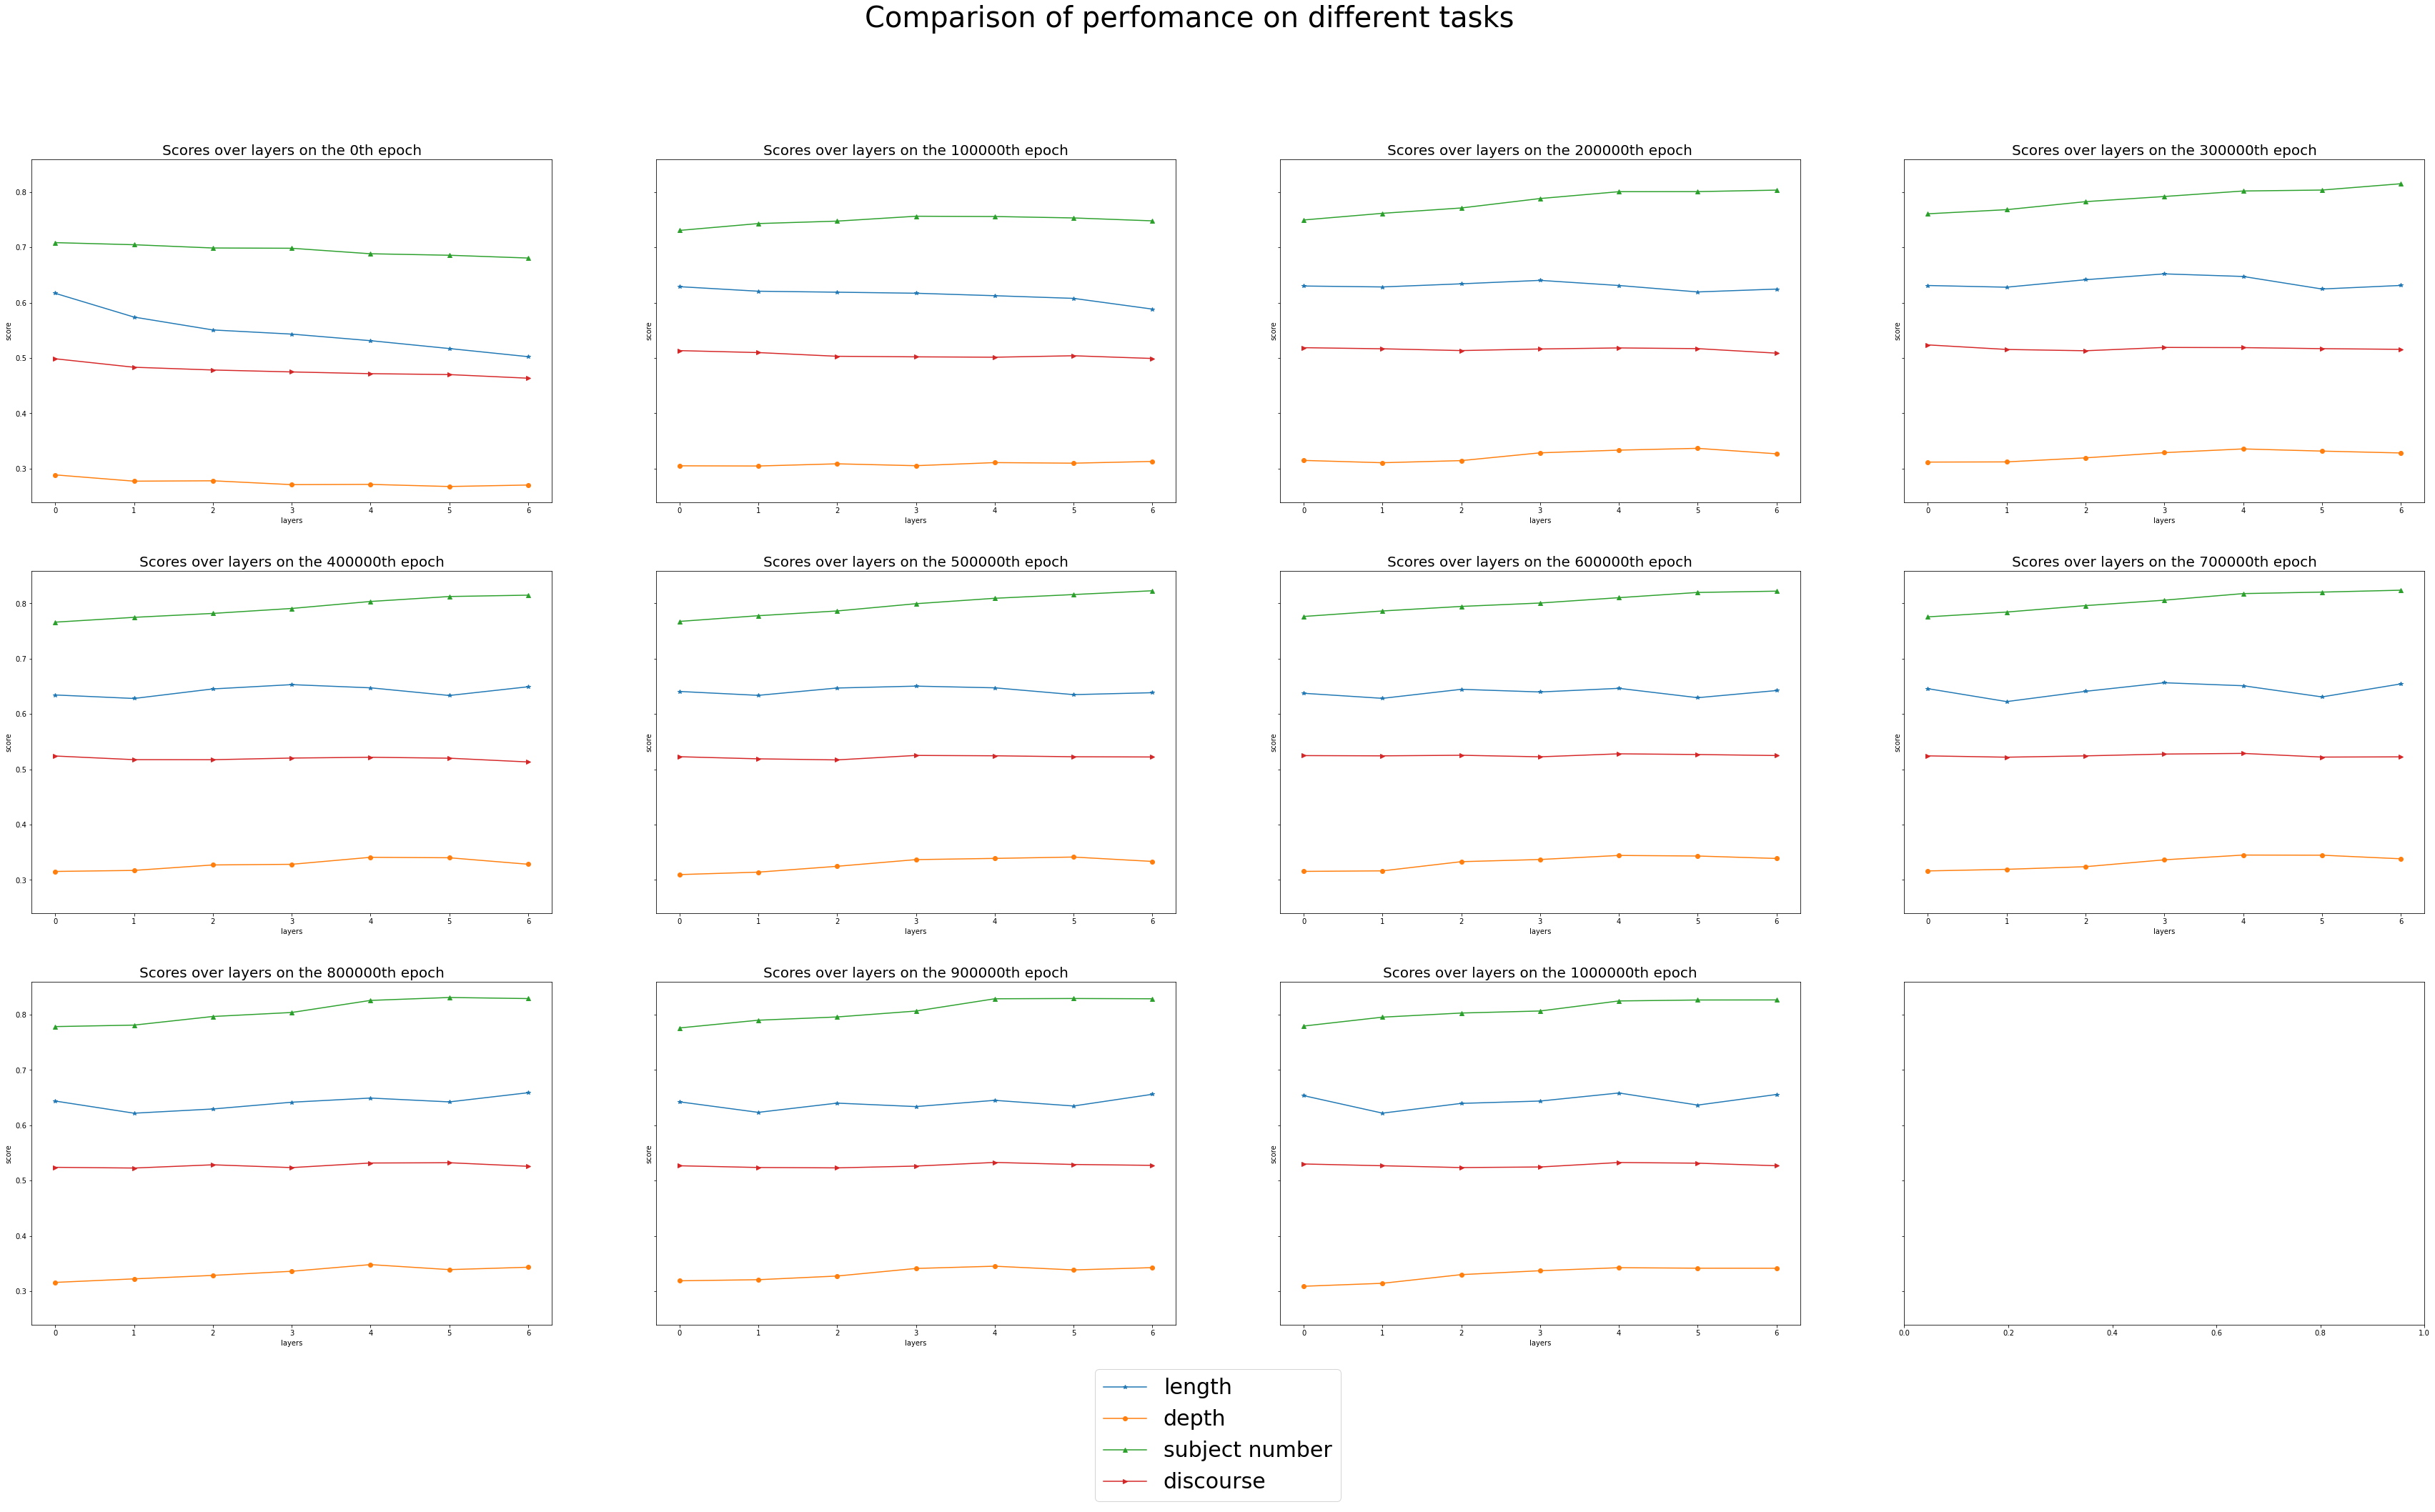

In [32]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(60, 30), sharey=True)

epoches = 1100000
x = 0
j = 0
for i in range(0, epoches, 100000):
    layers = ax[x, j].plot(layer, length[length['epoche']==i]['accuracy'], label='length', marker='*')
    layers = ax[x, j].plot(layer, depth[depth['epoche']==i]['accuracy'], label='depth', marker='o')
    layers = ax[x, j].plot(layer, number[number['epoche']==i]['accuracy'], label='subject number', marker='^')
    layers = ax[x, j].plot(layer, disc[disc['epoche']==i]['accuracy'], label='discourse', marker='>')
    layers = ax[x, j].set_xlabel('layers')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over layers on the {i}th epoch', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':30})
plt.show()

In [35]:
def plot_accuracy(df):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10), sharey=True)

    x = 0
    j = 0
    epoches = set(df['epoche'])
    layer = df.iloc[:7]['layer']
    colours = [[1, 0, 0], [0.2, 1, 0], [0, 0.5, 1], [0.7, 0.5, 0]]
    for i in range(0, len(epoches), 3):
        r, b, g = colours[i//3]
        i = i * 100000
        layers = ax[x, j].plot(layer, df[df['epoche'] == i]['accuracy'], color=(r, b, g, 0.3), label=i)
        layers = ax[x, j].plot(layer, df[df['epoche'] == i+100000]['accuracy'],color=(r, b, g, 0.5), label=i+100000)
        if i+200000 < 1000000: #  there are only 11 epoches in the dataset
            layers = ax[x, j].plot(layer, df[df['epoche'] == i+200000]['accuracy'], color=(r, b, g, 0.8), label=i+200000)
        layers = ax[x, j].set_xlabel('layers')
        layers = ax[x, j].set_ylabel('score')
        layers = ax[x, j].set_title(f'Scores over layers on the {i}, {i+100000}, and {i+200000}th epoches')
        if j != 1:
            j += 1
        else:
            j = 0
            x += 1
    fig.suptitle(f'Accuracy on {df["task"].iloc[0]}', size=20)
    fig.legend()
    plt.show()

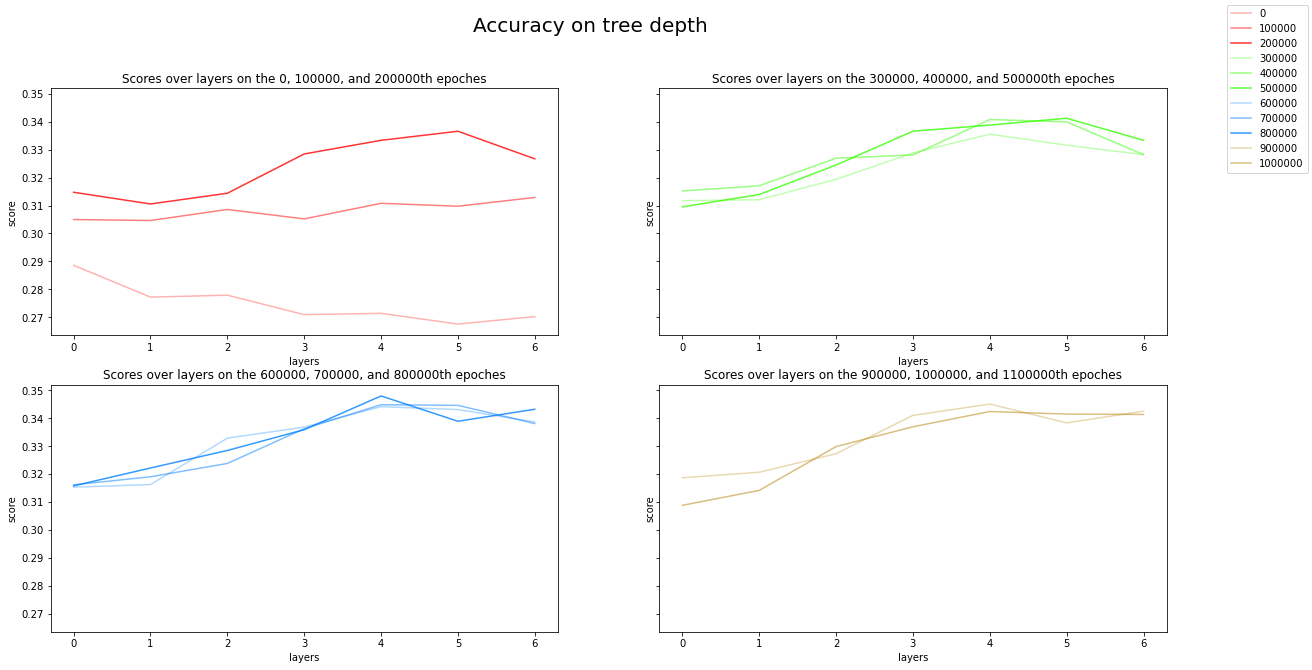

In [36]:
plot_accuracy(depth)

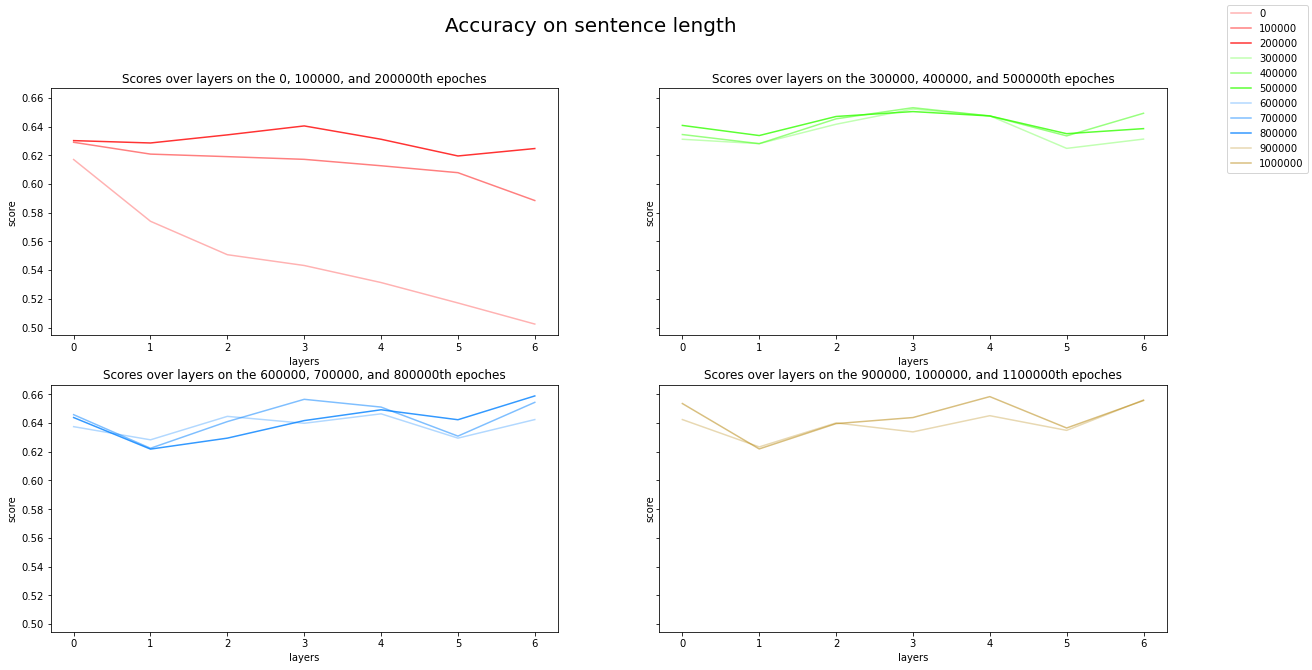

In [37]:
plot_accuracy(length)

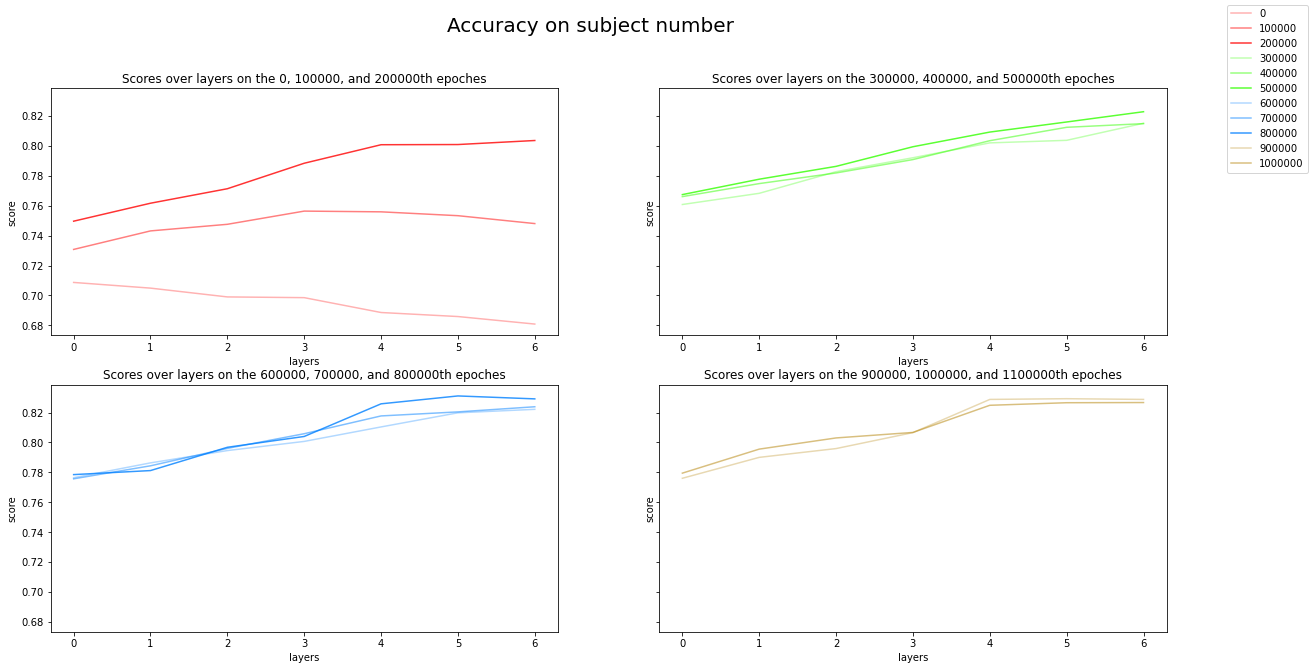

In [38]:
plot_accuracy(number)

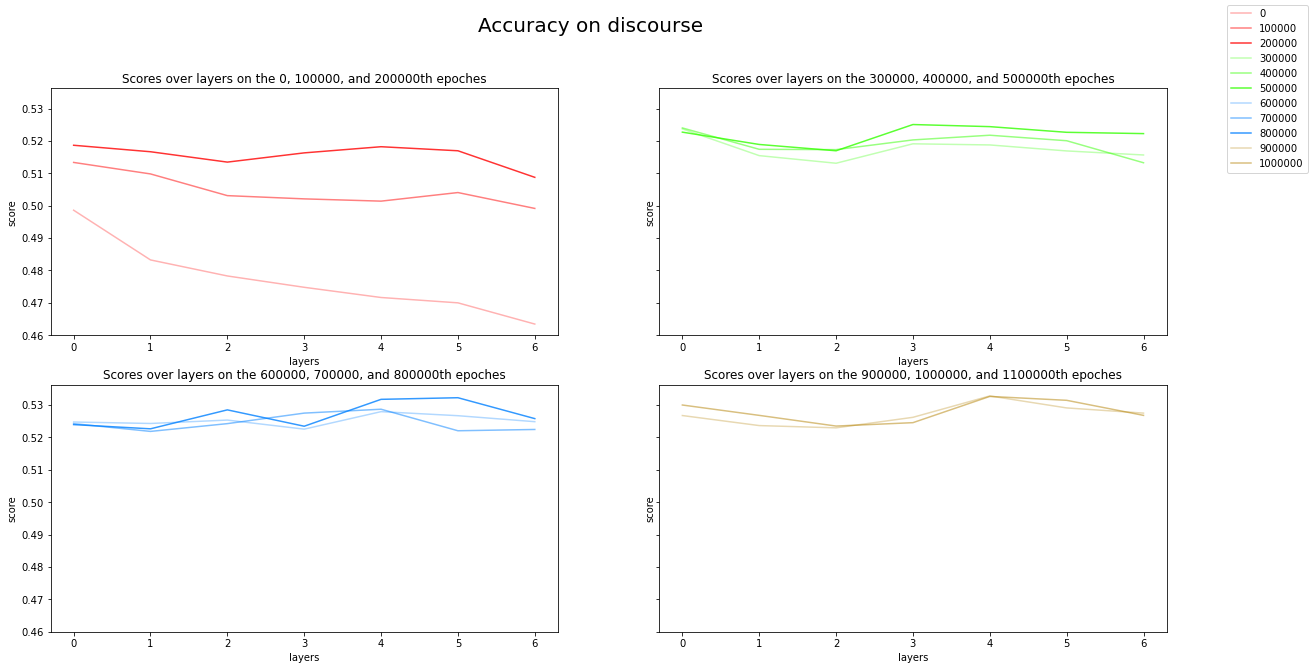

In [39]:
plot_accuracy(disc)

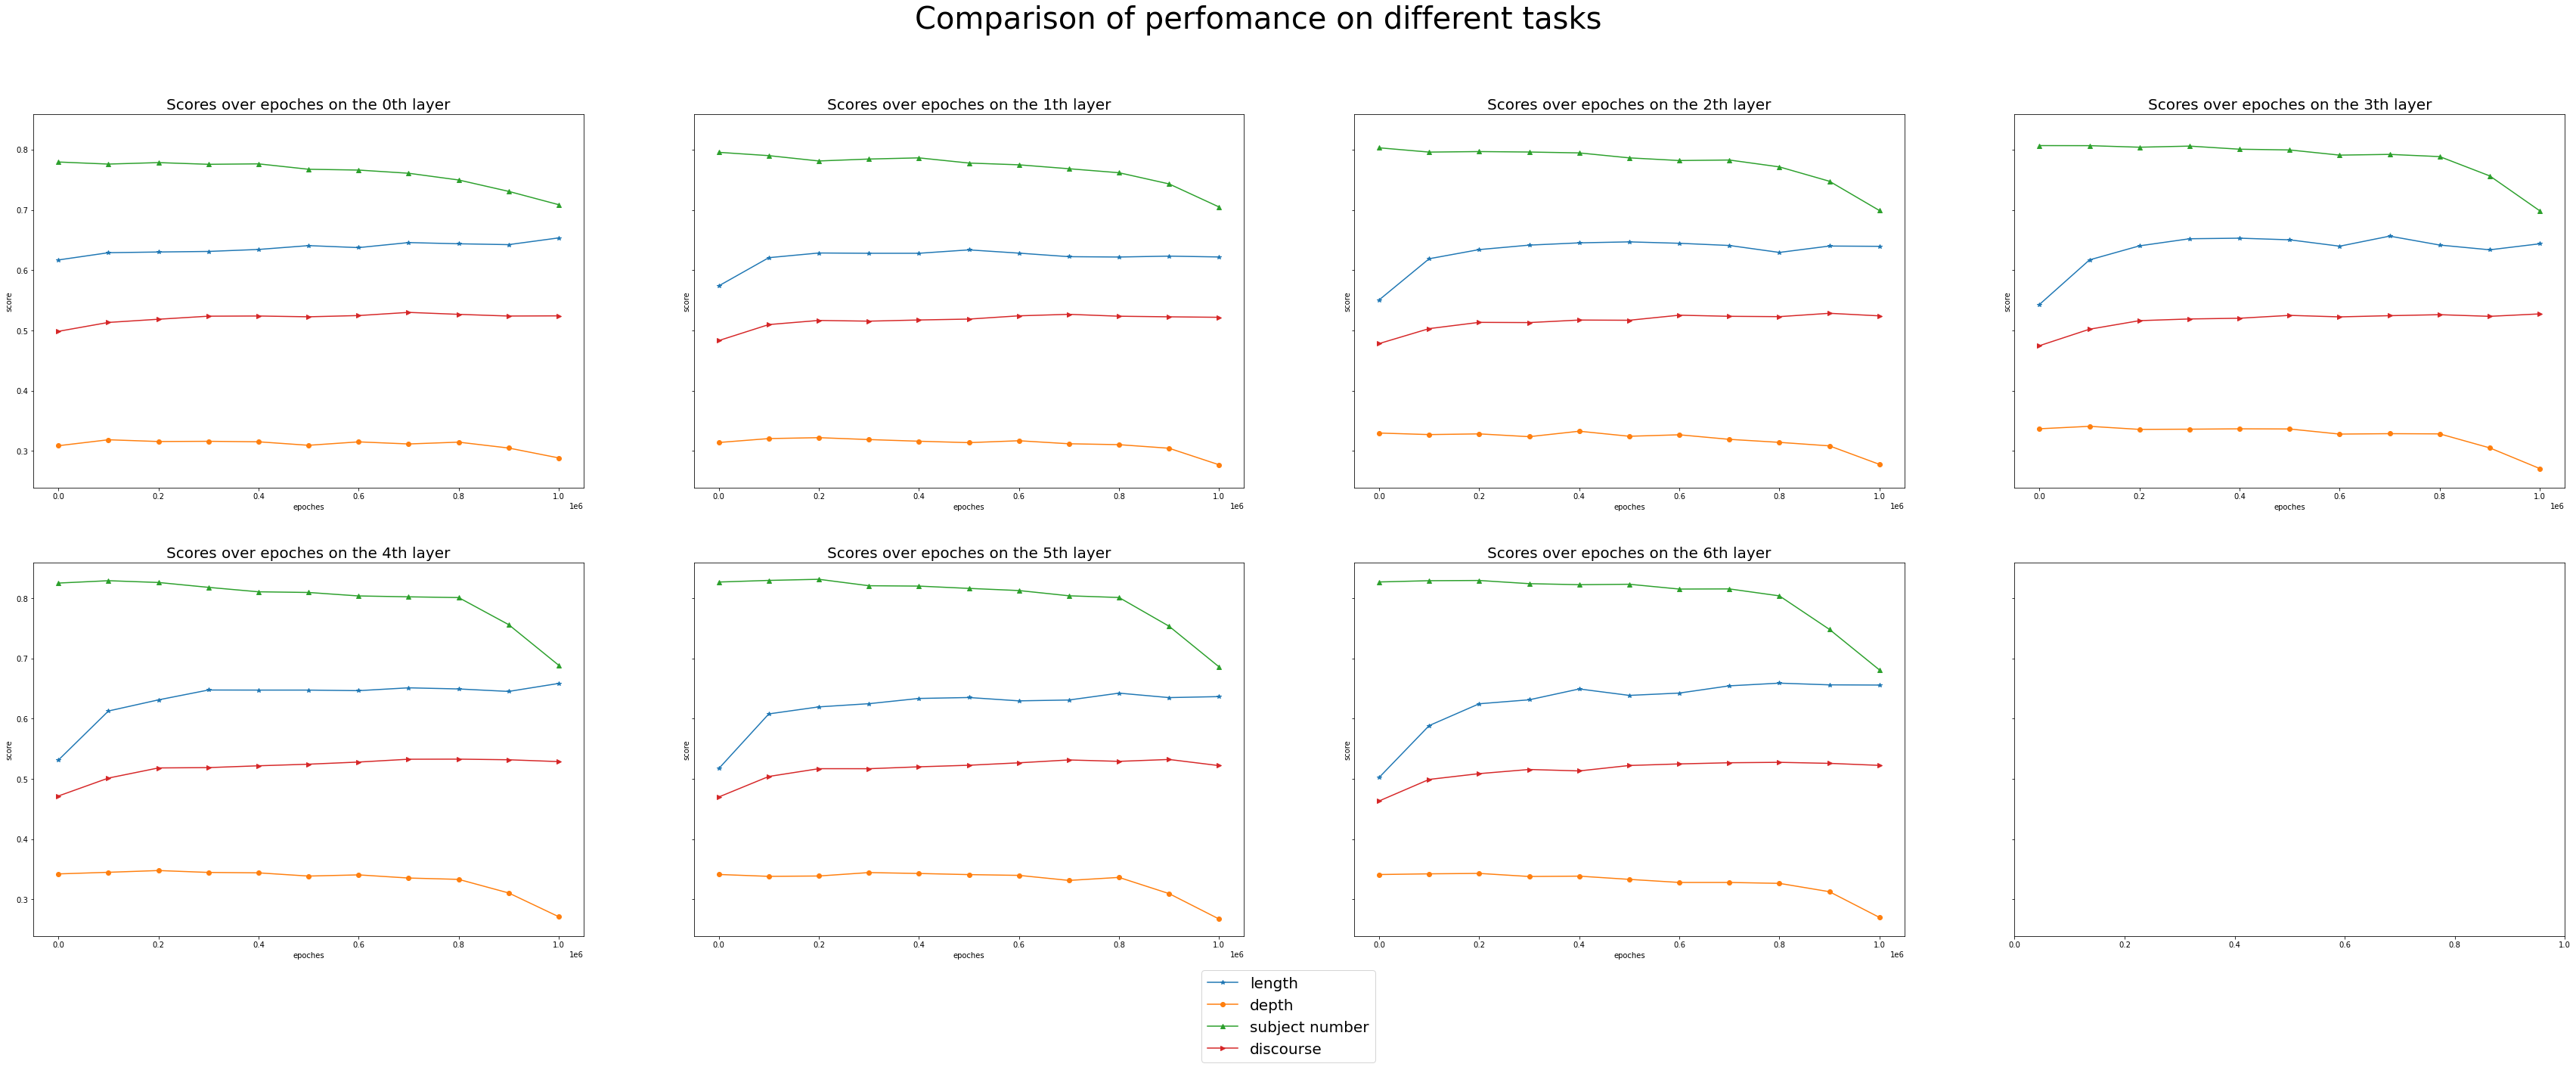

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(60, 20), sharey=True)

l = 7
epoches = list(range(0, 1100000, 100000))
x = 0
j = 0
for i in range(l):
    layers = ax[x, j].plot(epoches, length[length['layer']==i]['accuracy'], label='length', marker='*')
    layers = ax[x, j].plot(epoches, depth[depth['layer']==i]['accuracy'], label='depth', marker='o')
    layers = ax[x, j].plot(epoches, number[number['layer']==i]['accuracy'], label='subject number', marker='^')
    layers = ax[x, j].plot(epoches, disc[disc['layer']==i]['accuracy'], label='discourse', marker='>')
    layers = ax[x, j].set_xlabel('epoches')
    layers = ax[x, j].set_ylabel('score')
    layers = ax[x, j].set_title(f'Scores over epoches on the {i}th layer', size=20)
    if j != 3:
        j += 1
    else:
        j = 0
        x += 1
        
handles, labels = ax[0, 0].get_legend_handles_labels()
fig.suptitle(f'Comparison of perfomance on different tasks', size=40)
fig.legend(handles, labels, loc='lower center', prop={'size':20})
plt.show()